# Brain-Computer Interfaces (Fall 2017, ELE 594) 
# Instructor: Yalda Shahriari
# 3th homework, 11/1/17 (The homework, is due by Nov 8th, 11:55 pm).

Part 2:
Instructions for part 2:

In this part, use the dataset you recorded yourselves for eye blink, eye closed, eye open, and teeth clench conditions.

2- 
(a) Compute the power spectral density (PSD) of the entire eyes open and eyes closed conditions for channel “Oz”.

Plot the resulting PSD from 0-70 Hz (i.e., both eyes open and eyes closed conditions in one plot) in the same plot, with separate subplots for each subject. 

Be sure to use common axis with clear labels for each subject.

Hint: For PSD use 256-pt pwelch Matlab function. 

For parameters, use windows of 1-second with 50% overlap. 

All the PSD plots should be in 10log10 scale.

(b) Identify the peak alpha frequency for each subject and plot the topographies for the eyes open and closed condition. 

Use separate subplots and colorbars for each subject.

In [50]:
import scipy.io
import numpy as np

# sampleEEGdata = spio.loadmat(file_name='../data/bci/sampleEEGdata.mat')

In [51]:
# Each data file for each subject has been saved with initials of that subject. 
# The data related to each condition also has been saved with the name of that condition 
# (e.g., "SH_sig_blink" is the blink data for Sarah Hosni). 
# The data has been collected from 16 channels. 
# The channel names and locations are also shared with you as "eloc 16.txt" file along with the subjects' data.
# Loading the recorded data
mydata = scipy.io.loadmat(file_name='../../data/bci/hw3/subjects/AD.mat')
mydata.keys()

dict_keys(['__header__', 'Sampling_Rate', '__version__', 'AD_sig_clench', '__globals__', 'AD_sig_blink', 'AD_sig_eyes_closed', 'AD_sig_eyes_open'])

In [52]:
(mydata['AD_sig_blink'].shape, mydata['AD_sig_clench'].shape, mydata['AD_sig_eyes_closed'].shape, 
mydata['AD_sig_eyes_open'].shape)

((15448, 16), (15600, 16), (15456, 16), (15392, 16))

In [53]:
(mydata['AD_sig_blink'].dtype, mydata['AD_sig_clench'].dtype, mydata['AD_sig_eyes_closed'].dtype, 
mydata['AD_sig_eyes_open'].dtype)

(dtype('<f8'), dtype('<f8'), dtype('<f8'), dtype('<f8'))

In [141]:
ADsrate = mydata['Sampling_Rate'][0, 0]
AD_sig_eyes_closed = mydata['AD_sig_eyes_closed']
AD_sig_eyes_open = mydata['AD_sig_eyes_open']

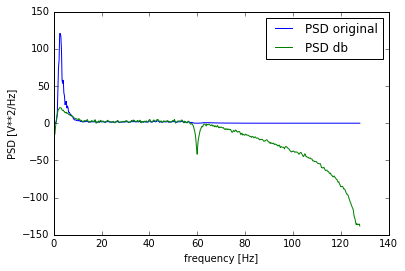

In [142]:
# Compute and plot the power spectral density for the first channel of data
f, PSD = signal.welch(x=AD_sig_eyes_open[:, 0], fs=ADsrate, nperseg=1024, axis=0)
PSD_db = 10*np.log10(PSD)
plt.plot(f, PSD) # PSD=Pxx_den
plt.plot(f, PSD_db) # PSD=Pxx_den
# plt.ylim([1e-14, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend(['PSD original', 'PSD db'])
plt.show()

In [143]:
from scipy.stats.mstats import zscore # normalizing with zero-mean, uni-vari/ std

# Plot the resulting PSD from 0-70 Hz (i.e., both eyes open and eyes closed conditions in one plot) 
# in the same plot, with separate subplots for each subject.
# We need to create. a low-pass filter using wavelet or complex morlet wavelet

# nyquist = EEGsrate/2 #hz
# nyquist = mydata['Sampling_Rate'][0, 0]/2 # 256=2**8: 1-byte or 8-Bit, 
# 128 nyquist in thi case
center_freq = 70/2 #in hz 
# PSD from 0-70 Hz , 35
filter_frequency_spread = 35 #Hz, +- center frequency

#create wavelet window
# # create kernel/ conv/ filter time window
# time = np.arange(-1000/EEGsrate/10., 1000/EEGsrate/10. + 1/EEGsrate, 1/EEGsrate)
# f_srate = ADsrate #mydata['Sampling_Rate'][0, 0] # Hz
# num_pnts = AD_sig_eyes_open.shape[0]
num_ch = AD_sig_eyes_open.shape[1]
time = np.arange(0.0, num_pnts/ADsrate + 1/ADsrate, 1/ADsrate)

# filter_frequency_spread == num cycles
scale = (filter_frequency_spread/(2*np.pi*center_freq))
gauss = np.exp(-(time**2) / (2*(scale**2)))
sine = np.exp(1j * 2*np.pi*center_freq * time)
wavelet = sine * gauss 

# normalized
wavelet = zscore(wavelet)

# # compute its power spectrum after normalization
# # or power spectrum density for wavelet filter
# fft_wavelet = np.absolute(fft(wavelet))
# fft_wavelet /= np.max(fft_wavelet) #normalized to one for visual comparison case
# hz = np.linspace(0, nyquist, (len(time)/2) + 1) 

# # apply the filter kernal to the data to obtain the band-pass filtered signal
# wavelet_data = np.zeros_like(mydata['AD_sig_eyes_open'])
filtered_data = [] # python list data structure

# filtered data using convolution or convolved data using filter
for ch_idx in range(num_ch):
    conved_data = np.convolve(a=wavelet, mode='same', 
                                          v=AD_sig_eyes_open[:, ch_idx]) # no trials
    filtered_data.append(conved_data)
    
filtered_data = np.array(filtered_data)

In [144]:
filtered_data.shape, filtered_data.dtype, np.absolute(filtered_data[0]).shape, np.absolute(filtered_data[0]).dtype

((16, 15393), dtype('complex128'), (15393,), dtype('float64'))

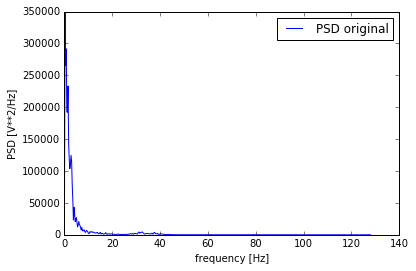

In [147]:
# Compute and plot the power spectral density for the first channel of data
f, PSD = signal.welch(x=np.absolute(filtered_data[0]), fs=ADsrate, nperseg=1024, axis=0)
PSD_db = 10*np.log10(PSD)
plt.plot(f, PSD) # PSD=Pxx_den
# plt.plot(f, PSD_db) # PSD=Pxx_den
# plt.ylim([1e-14, 1e5]) 
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend(['PSD original', 'PSD db'])
plt.show()

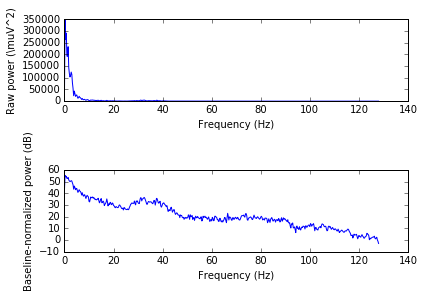

In [153]:
# time2plot = 300 # in ms
# timeidx = argmin(np.abs(EEGtimes-time2plot))
plt.subplot(211)
plt.plot(f,PSD)
# title( 'Power spectrum at ' + str(EEGtimes[timeidx]) + ' ms' )
plt.ylabel('Raw power (\muV^2)')
plt.xlabel('Frequency (Hz)')

plt.subplot(212)
plt.plot(f,PSD_db)
plt.ylabel('Baseline-normalized power (dB)')
plt.xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

